In [61]:
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

import warnings
warnings.filterwarnings("ignore")

from lib import *

In [62]:
train_data_set = np.load("fashion_train.npy")
test_data_set = np.load("fashion_test.npy")


# We have 10000 images in the training set
len(train_data_set)

# To find classification for each element, the last value in the set is:
# 0 for T-shirt/top
# 1 for Trousers
# 2 for Pullover
# 3 for Dress
# 4 for Shirt
len(train_data_set[0])

785

In [63]:
# We need to clean the array, as the last value is the classification. Let's first save these separately.

train_classes = []

for i in range(len(train_data_set)):
    train_classes.append(train_data_set[i][784])
      
train_classes = np.array(train_classes)
#train_classes = train_classes.reshape(-1, 1)


test_classes = []

for i in range(len(test_data_set)):
    test_classes.append(test_data_set[i][784])
      
test_classes = np.array(test_classes)
#test_classes = test_classes.reshape(-1, 1)

In [64]:
# Now we can delete the last element and have a cleaned training set that we can work with.

cleaned_train_set = np.empty((len(train_data_set), 784), dtype=np.uint8)

for i in range(len(train_data_set)):
    temp = np.delete(train_data_set[i], 784)
    cleaned_train_set[i] = temp
    
    
cleaned_test_set = np.empty((len(test_data_set), 784), dtype=np.uint8)

for i in range(len(test_data_set)):
    temp = np.delete(test_data_set[i], 784)
    cleaned_test_set[i] = temp

In [65]:
# We reshape it so that the 1D array becomes a 2D 28x28 array.
cleaned_train_set_reshaped = cleaned_train_set.reshape(-1, 28, 28)
cleaned_test_set_reshaped = cleaned_test_set.reshape(-1, 28, 28)

In [66]:
# Two simple functions for working with our data

def show_image(index_num):
    '''
    Simple function for showing the image and printing the category.
    
    index_num: The index you would like to show.
    '''
    img = cleaned_train_set_reshaped[index_num]
    #img2 = np.invert(img)
    plt.imshow(np.invert(img), cmap ='gray', vmin = 0, vmax = 255)
    plt.show()
    text = ""

    cloth_cat = train_classes[index_num]
    if cloth_cat == 0:
        text = "0: This is a t-shirt/top"
    if cloth_cat == 1:
        text = "1: This is a pair of trousers"
    if cloth_cat == 2:
        text = "2: This is a pullover"
    if cloth_cat == 3:
        text = "3: This is a dress"
    if cloth_cat == 4:
        text = "4: This is a shirt"
    
    #print(text)
    return text
        
def count_categories(categories):
    '''
    Another stupidly simple function for counting the categories.
    
    categories: The numpy array of all categories, corresponding to index number.
    '''  
    ze_val = on_val = tw_val = th_val = fo_val = 0
    
    for i in categories:
        if i == 0:
            ze_val += 1
        if i == 1:
            on_val += 1
        if i == 2:
            tw_val += 1
        if i == 3:
            th_val += 1
        if i == 4:
            fo_val += 1
    
    print(f'There are {ze_val} t-shirts/tops. There are {on_val} pairs of trousers. There are {tw_val} pullovers. There are {th_val} dresses. There are {fo_val} shirts.')
    

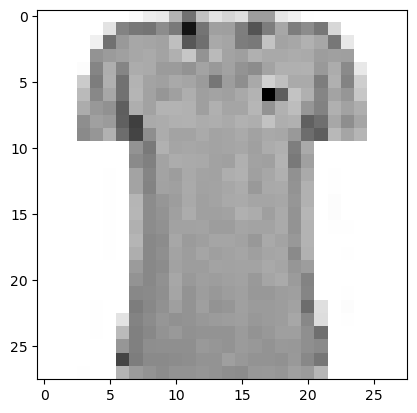

'4: This is a shirt'

In [67]:
show_image(random.randint(0, 9999))

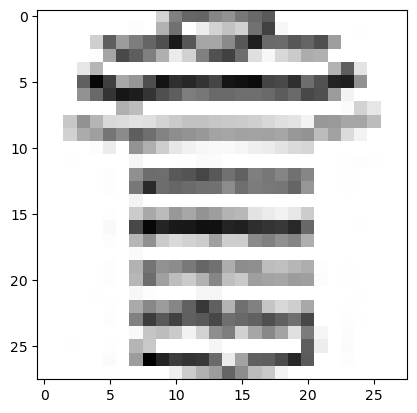

There are 2033 t-shirts/tops. There are 1947 pairs of trousers. There are 2001 pullovers. There are 2005 dresses. There are 2014 shirts.


In [68]:
show_image(55)

count_categories(train_classes)

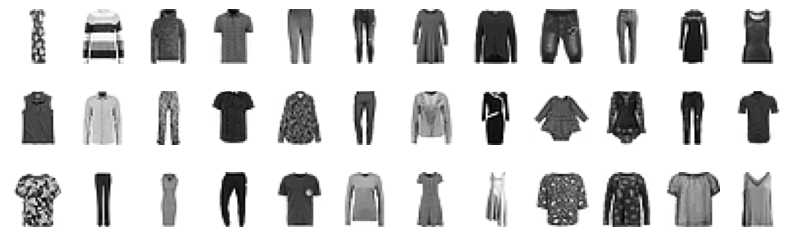

In [69]:
fig, axarr = plt.subplots( 3, 12, figsize=(10, 3))
ax = plt.Axes(fig, [0, 0, 1, 1.])
for y, a in enumerate(axarr[1]):
    axarr[0,y].set_axis_off()
    axarr[1,y].set_axis_off()
    axarr[2,y].set_axis_off()
    axarr[0,y].imshow((np.invert(cleaned_train_set_reshaped[random.randint(0,9999)])), cmap='gray')
    axarr[1,y].imshow((np.invert(cleaned_train_set_reshaped[random.randint(0,9999)])), cmap='gray')
    axarr[2,y].imshow((np.invert(cleaned_train_set_reshaped[random.randint(0,9999)])), cmap='gray')

In [70]:
print(cleaned_train_set_reshaped.shape)
print(cleaned_test_set_reshaped.shape)

(10000, 28, 28)
(5000, 28, 28)


## Plotting the data

Transformed data shape: (10000, 20)
Explained variance ratio: [0.32309944 0.16269657 0.07730526 0.04168682 0.032853   0.02237558
 0.01941181 0.01781261 0.01496688 0.01272808 0.01136404 0.00969832
 0.00832406 0.00743116 0.00731417 0.0067726  0.00669191 0.00636827
 0.00565896 0.0050357 ]


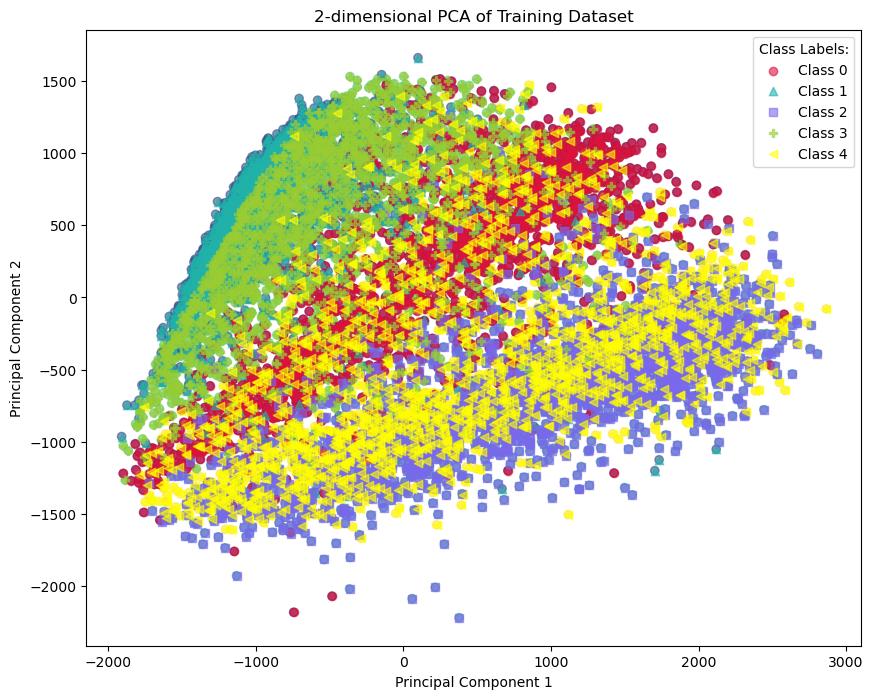

In [71]:
# Perform PCA
pca = PCA(n_components=20)  # You can adjust this number if needed
pca_train_result = pca.fit_transform(cleaned_train_set)

# Print the shapes and explained variance ratio
print("Transformed data shape:", pca_train_result.shape)
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Visualize the first two principal components
pca_2d = pca_train_result[:, :2]  # Get the first two components

plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=train_classes, cmap='viridis', alpha=0.6)

colors = ['crimson', 'lightseagreen', 'mediumslateblue', 'yellowgreen', 'yellow']
markers = ['o', '^', 's', 'P', '<']
for i, class_label in enumerate(np.unique(train_classes)):
    mask = train_classes == class_label
    plt.scatter(pca_2d[mask, 0], pca_2d[mask, 1], 
                color=colors[i],
                marker=markers[i],
                label=f'Class {class_label}', 
                alpha=0.6)
# Label axes and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class Labels:')
plt.title('2-dimensional PCA of Training Dataset')

# Show the plot
plt.show()


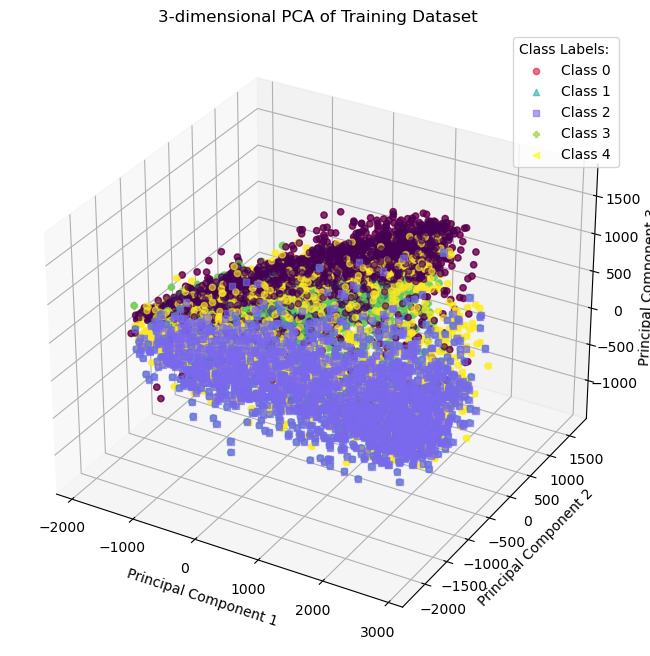

In [72]:
# Get the first three principal components
pca_3d = pca_train_result[:, :3]

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the points
scatter = ax.scatter(pca_3d[:, 0], pca_3d[:, 1], pca_3d[:, 2], c=train_classes, cmap='viridis', alpha=0.6)

colors = ['crimson', 'lightseagreen', 'mediumslateblue', 'yellowgreen', 'yellow']
markers = ['o', '^', 's', 'P', '<']
for i, class_label in enumerate(np.unique(train_classes)):
    mask = train_classes == class_label
    ax.scatter(pca_3d[mask, 0], pca_3d[mask, 1], pca_3d[mask, 2],
                color=colors[i],
               marker = markers[i],
                label=f'Class {class_label}', 
                alpha=0.6)

# Set labels
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3-dimensional PCA of Training Dataset')


ax.legend(title='Class Labels: ')

# Show the plot
plt.show()

The axes' values are very large. Not very useful and can lead to weird model behavior. Therefore, let's do:

## Dimensional reduction using PCA

In [73]:
# We normalise the pixel values of the images to range from 0 to 1
X_train = cleaned_train_set/255
X_test = cleaned_test_set/255

# Not used at the moment, but if we need to reshape our y to be (n, 1)
y_train = train_classes.reshape(-1, 1)
y_test = test_classes.reshape(-1, 1)

# Standardize the data
scaler = StandardScaler()
stand_X_train = scaler.fit_transform(X_train)

# Also apply standardization to test data
stand_X_test = scaler.transform(X_test)


In [74]:
# Time to find the right number of PCA components, as we want the components to explain 90% of the variance in total.
pca_components = len(stand_X_train[0])
pca = PCA(pca_components)
pca_train_result = pca.fit_transform(stand_X_train)


pca_sum_list = [pca.explained_variance_ratio_[0]]
i = 1

while sum(pca_sum_list) < 0.90:
    pca_sum_list.append(pca.explained_variance_ratio_[0+i])
    i += 1

In [75]:
len(pca_sum_list)

112

#### NOTE: Add a cumulative explained variance by Principal Components graph

In [76]:
# Print the shapes and explained variance ratio
pca_components = len(pca_sum_list)
pca = PCA(pca_components)
pca_train_result = pca.fit_transform(stand_X_train)
pca_test_result = pca.transform(stand_X_test)

print("Transformed data shape:", pca_train_result.shape)
print("Explained variance ratio:", pca.explained_variance_ratio_[:50])

print(f'The sum of our PCA\'s explained variance: {sum(pca.explained_variance_ratio_)}')

Transformed data shape: (10000, 112)
Explained variance ratio: [0.22645698 0.13673557 0.06381166 0.05046707 0.03064291 0.02924805
 0.02197067 0.01880203 0.0147053  0.01416444 0.01298674 0.01232636
 0.01005118 0.00914286 0.00886118 0.00844979 0.00800824 0.0074046
 0.0071842  0.00678097 0.00637763 0.00625898 0.0059261  0.00557587
 0.00524909 0.00501018 0.00489192 0.0047749  0.00451686 0.00424941
 0.00419099 0.00403955 0.00393599 0.00388444 0.00379559 0.00362945
 0.00357774 0.00351894 0.00333661 0.00324689 0.00315796 0.00312242
 0.00298242 0.00291243 0.00277144 0.00273708 0.0026438  0.00258013
 0.00245687 0.00243532]
The sum of our PCA's explained variance: 0.9007462330004185


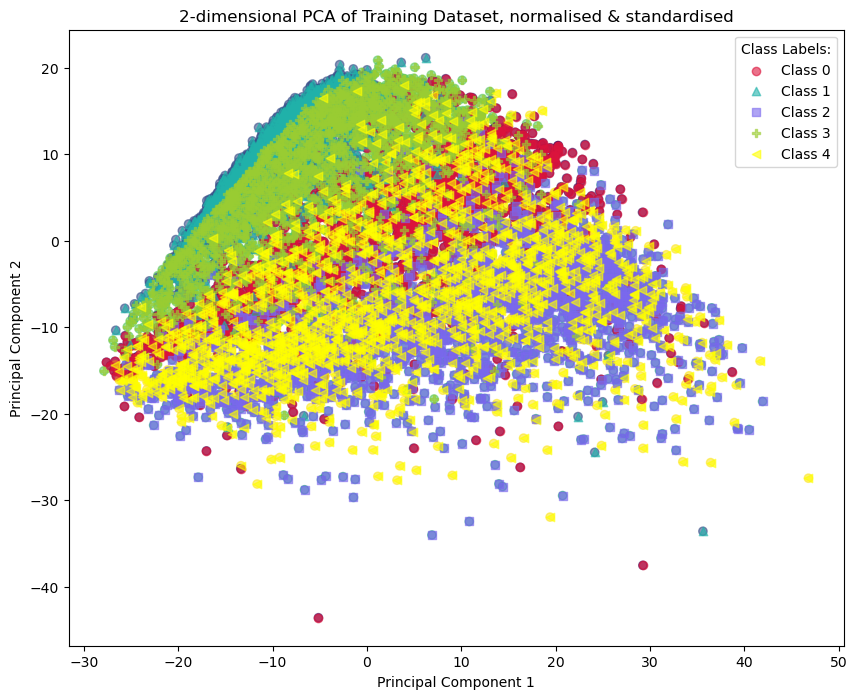

In [77]:
# Visualize the first two principal components
pca_2d = pca_train_result[:, :2]  # Get the first two components

plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=train_classes, cmap='viridis', alpha=0.6)

colors = ['crimson', 'lightseagreen', 'mediumslateblue', 'yellowgreen', 'yellow']
markers = ['o', '^', 's', 'P', '<']
for i, class_label in enumerate(np.unique(train_classes)):
    mask = train_classes == class_label
    plt.scatter(pca_2d[mask, 0], pca_2d[mask, 1], 
                color=colors[i],
                marker=markers[i],
                label=f'Class {class_label}', 
                alpha=0.6)

# Label axes and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class Labels:')
plt.title('2-dimensional PCA of Training Dataset, normalised & standardised')

# Show the plot
plt.show()


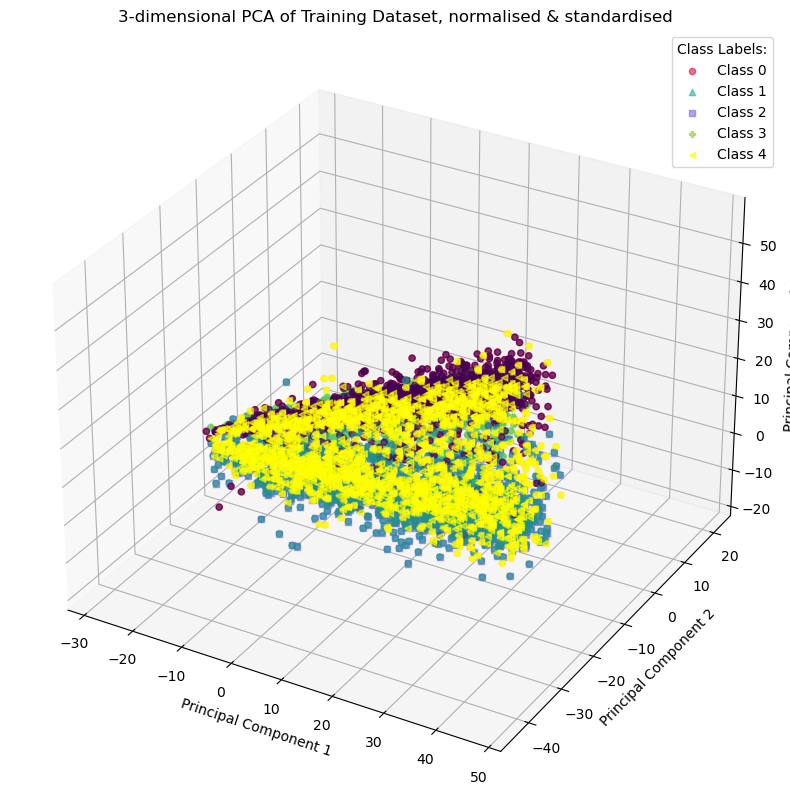

In [78]:
# For an interactive 3D plot, use plotly.express

# Get the first three principal components
pca_3d = pca_train_result[:, :3]

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the points
scatter = ax.scatter(pca_3d[:, 0], pca_3d[:, 1], pca_3d[:, 2], c=train_classes, cmap='viridis', alpha=0.6)

colors = ['crimson', 'lightseagreen', 'mediumslateblue', 'yellowgreen', 'yellow']
markers = ['o', '^', 's', 'P', '<']
for i, class_label in enumerate(np.unique(train_classes)):
    mask = train_classes == class_label
    ax.scatter(pca_3d[mask, 0], pca_3d[mask, 1], pca_3d[mask, 2],
                color=colors[i],
               marker = markers[i],
                label=f'Class {class_label}', 
                alpha=0.6)

# Set labels
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3-dimensional PCA of Training Dataset, normalised & standardised')

ax.legend(title='Class Labels:')

# Show the plot
plt.show()

In [79]:
# TO BE DONE: Find a method that gives the lowest test error rate (and not training error rate) (p. 35) Lets get started on KNN
# 

In [80]:
# Load training data
X, y = pca_train_result, train_classes
X_test, y_test = pca_test_result, test_classes

classifier_dec_tree = DecisionTreeClassifier()


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25)

In [81]:
print(len(X_train))
print(len(y_train))
print(len(X_val))
print(len(y_val))
print(len(X_test))
print(len(y_test))

7500
7500
2500
2500
5000
5000


In [82]:
class TreeNode:
    def __init__(self, predicted_class, depth=None):
        self.predicted_class = predicted_class
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None
        self.leftbranch = False
        self.rightbranch = False
        self.depth = depth

class DecisionTreeClassifierNP:
    # Reference: Chris Jakuc - https://medium.com/@cjakuc/building-a-decision-tree-classifier-c00a08815c3
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None
        
        
    def fit(self, X:np.array, y:np.array):
        self.num_classes = len(np.unique(y))
        self.num_features = X.shape[1]
        self.tree = self.grow_tree(X, y)
        
    def find_split(self, X, y):
        ideal_col = None
        ideal_threshold = None
        
        
        num_observations = y.size
        if num_observations <= 1:
            return ideal_col, ideal_threshold
        
        y = y.reshape(num_observations,)
        
        # Supress warnings
        #with warnings.catch_warnings():
        #    warnings.filterwarnings(action='ignore', category=FutureWarning)
        count_in_parent = [np.count_nonzero(y == c) for c in range(self.num_classes)]
        
        best_gini = 1.0 - sum((n / num_observations) ** 2 for n in count_in_parent)
        
        
        # Creating a temp version of y for concatenating below
        temp_y = y.reshape(y.shape[0], 1)
        
        for col in range(self.num_features):
            temp_X = X[:, col].reshape(num_observations, 1)
            all_data = np.concatenate((temp_X, temp_y), axis = 1)
            sorted_data = all_data[np.argsort(all_data[:, 0])]
            thresholds, obs_classes = np.array_split(sorted_data, 2, axis = 1)
            obs_classes = obs_classes.astype(int)
            
            num_left = [0] * self.num_classes
            num_right = count_in_parent.copy()
            
            for i in range(1, num_observations):
                class_ = obs_classes[i-1][0]
                num_left[class_] += 1
                num_right[class_] -= 1
                gini_left = 1.0 - sum((num_left[x] / i) ** 2 for x in range(self.num_classes))
                gini_right = 1.0 - sum((num_right[x] / (num_observations - i)) ** 2 for x in range(self.num_classes))
                gini = (i * gini_left + (num_observations - i) * gini_right) / num_observations
                
                if thresholds[i][0] == thresholds[i-1][0]:
                    continue
                    
                
                if gini < best_gini:
                    best_gini = gini
                    ideal_col = col
                    ideal_threshold = (thresholds[i][0] + thresholds[i-1][0]) / 2
        
        return ideal_col, ideal_threshold
    
    
    def grow_tree(self, X, y, depth=0):
        #with warnings.catch_warnings():
        #    warnings.filterwarnings(action='ignore', category = FutureWarning)
        pop_per_class = [np.count_nonzero(y == i) for i in range(self.num_classes)]
            
        predicted_class = np.argmax(pop_per_class)
        
        node = TreeNode(predicted_class=predicted_class, depth=depth)
        node.samples = y.size
        
        if depth < self.max_depth:
            col, threshold = self.find_split(X, y)
            if col and threshold:
                indices_left = X[:, col] < threshold
                X_left, y_left = X[indices_left], y[indices_left]
                indices_right = X[:, col] >= threshold
                X_right, y_right = X[indices_right], y[indices_right]
                node.feature_index = col
                node.threshold = threshold
                node.left = self.grow_tree(X_left, y_left, depth+1)
                node.left.leftbranch = True
                node.right = self.grow_tree(X_right, y_right, depth+1)
                node.right.rightbranch = True
        
        return node
    
    def predict(self, X_test):
        node = self.tree
        predictions = []
        for obs in X_test:
            node = self.tree
            while node.left:
                if obs[node.feature_index] < node.threshold:
                    node = node.left
                else:
                    node = node.right
            predictions.append(node.predicted_class)
        return np.array(predictions)


In [83]:
testing_tree = DecisionTreeClassifierNP(max_depth = 10)
testing_tree.fit(X_train, y_train)

In [84]:
predictions = testing_tree.predict(X_val)

In [85]:
classifier_dec_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 10)
classifier_dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [86]:
predictions_scikit = classifier_dec_tree.predict(X_val)

In [87]:
# To check our metrics, we use sklearn.
from sklearn.metrics import accuracy_score, classification_report

In [88]:
print("Accuracy:", accuracy_score(y_val, predictions))
print(classification_report(y_val, predictions))

Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.72      0.72      0.72       508
           1       0.87      0.92      0.89       477
           2       0.73      0.78      0.75       494
           3       0.78      0.82      0.80       475
           4       0.65      0.54      0.59       546

    accuracy                           0.75      2500
   macro avg       0.75      0.76      0.75      2500
weighted avg       0.75      0.75      0.75      2500



In [89]:
print("Accuracy:", accuracy_score(y_val, predictions_scikit))
print(classification_report(y_val, predictions_scikit))

Accuracy: 0.7608
              precision    recall  f1-score   support

           0       0.72      0.73      0.72       508
           1       0.95      0.92      0.94       477
           2       0.75      0.79      0.77       494
           3       0.78      0.81      0.79       475
           4       0.63      0.58      0.60       546

    accuracy                           0.76      2500
   macro avg       0.76      0.77      0.76      2500
weighted avg       0.76      0.76      0.76      2500



In [90]:
def one_hot_encode(labels, num_classes):
    return np.eye(num_classes)[labels.astype(int)]

# Convert labels to one-hot encoding
C = 5  # Number of classes (0–4)
y_train_one_hot = one_hot_encode(y_train, C)
y_test_one_hot = one_hot_encode(y_test, C)
y_val_one_hot = one_hot_encode(y_val,C)

print("Shape of y_train_one_hot:", y_train_one_hot.shape)  
print("Shape of y_test_one_hot:", y_test_one_hot.shape) 
print("Shape of y_val_one_hot:", y_val_one_hot.shape) 


Shape of y_train_one_hot: (7500, 5)
Shape of y_test_one_hot: (5000, 5)
Shape of y_val_one_hot: (2500, 5)


In [91]:
import numpy as np

# --------------------
# 1. Initialization
# --------------------
input_dim = 112      # Number of PCA components
hidden_dim1 = 256     # Number of neurons in the first hidden layer
hidden_dim2 = 128     # Number of neurons in the second hidden layer
output_dim = 5       # Number of classes
learning_rate = 0.1


def initialize_params():
    params = {
        "wh": np.random.normal(0, np.sqrt(2 / input_dim), (input_dim, hidden_dim1)),  # He Initialization
        "bh": np.full((1, hidden_dim1), 0.01), 
        "wh2": np.random.normal(0, np.sqrt(2 / hidden_dim1), (hidden_dim1, hidden_dim2)),
        "bh2": np.full((1, hidden_dim2), 0.01), 
        "wo": np.random.normal(0, np.sqrt(2 / hidden_dim2), (hidden_dim2, output_dim)),
        "bo": np.full((1, output_dim), 0.01) 
    }
    return params





# --------------------
# 2. Activation Functions
# --------------------
def ReLU(x):
    return np.maximum(0, x)

def ReLU_derivative(x):
    return (x > 0).astype(float)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # Stability trick
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)





# --------------------
# 3. Loss Function
# --------------------
def cross_entropy_loss(predictions, labels):
    return -np.sum(labels * np.log(predictions + 1e-8)) / labels.shape[0]


def apply_dropout(x, dropout_rate):
    mask = (np.random.rand(*x.shape) > dropout_rate).astype(float)
    return x * mask / (1.0 - dropout_rate)

# --------------------
# 4. Gradient Clipping
# --------------------
def clip_gradients(grad, max_norm):
    norm = np.linalg.norm(grad)
    if norm > max_norm:
        grad = grad * (max_norm / norm)
    return grad

# --------------------
# 5. Forward Pass (dropout)
# --------------------
def forward_pass_with_dropout(X, params, dropout_rate=0.2):
    # Input to first hidden
    zh = X @ params['wh'] + params['bh']
    ah = ReLU(zh)
    ah = apply_dropout(ah, dropout_rate)  # Apply dropout

    # First hidden to second hidden
    zh2 = ah @ params['wh2'] + params['bh2']
    ah2 = ReLU(zh2)
    ah2 = apply_dropout(ah2, dropout_rate)  # Apply dropout

    # Second hidden to output
    zo = ah2 @ params['wo'] + params['bo']
    ao = softmax(zo)  # Output probabilities

    cache = {'zh': zh, 'ah': ah, 'zh2': zh2, 'ah2': ah2, 'zo': zo, 'ao': ao}
    return ao, cache

# --------------------
# 6. Backpropagation
# --------------------
def backpropagate(X, y, cache, params, learning_rate):
    # Output layer
    dL_dzo = cache['ao'] - y
    dL_dwo = clip_gradients(cache['ah2'].T @ dL_dzo, max_norm=1.0)
    dL_dbo = clip_gradients(dL_dzo.sum(axis=0, keepdims=True), max_norm=1.0)


    


    # Second hidden layer
    dL_dah2 = dL_dzo @ params['wo'].T
    dL_dzh2 = dL_dah2 * ReLU_derivative(cache['zh2'])
    dL_dwh2 = clip_gradients(cache['ah'].T @ dL_dzh2, max_norm=1.0)
    dL_dbh2 = clip_gradients(dL_dzh2.sum(axis=0, keepdims=True), max_norm=1.0)

    # First hidden layer
    dL_dah = dL_dzh2 @ params['wh2'].T
    dL_dzh = dL_dah * ReLU_derivative(cache['zh'])
    dL_dwh = clip_gradients(X.T @ dL_dzh, max_norm=1.0)
    dL_dbh = clip_gradients(dL_dzh.sum(axis=0, keepdims=True), max_norm=1.0)

    # Update weights and biases
    params['wo'] -= learning_rate * dL_dwo
    params['bo'] -= learning_rate * dL_dbo
    params['wh2'] -= learning_rate * dL_dwh2
    params['bh2'] -= learning_rate * dL_dbh2
    params['wh'] -= learning_rate * dL_dwh
    params['bh'] -= learning_rate * dL_dbh

    return params

# --------------------
# 7. Training Loop
# --------------------
def train_with_dropout(X_train, y_train_one_hot, params, epochs=200, dropout_rate=0.2):
    loss_history = []
    for epoch in range(epochs):
        # Forward pass with dropout
        ao, cache = forward_pass_with_dropout(X_train, params, dropout_rate)

        # Compute loss
        loss = cross_entropy_loss(ao, y_train_one_hot)
        loss_history.append(loss)

        # Backpropagation
        params = backpropagate(X_train, y_train_one_hot, cache, params, learning_rate)

        # Log progress
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")
    
    return params, loss_history



def train_with_hyperparameter_tuning(X_train, y_train_one_hot, params, learning_rates, epochs_list):
    best_params = None
    best_loss = float('inf')
    best_lr = None
    best_epochs = None

    # Loop over different learning rates and epochs
    for lr in learning_rates:
        for epochs in epochs_list:
            print(f"Training with learning_rate={lr}, epochs={epochs}")

            # Initialize parameters
            params = initialize_params()
            loss_history = []

            for epoch in range(epochs):
                # Forward pass
                ao, cache = forward_pass_with_dropout(X_train, params)

                # Compute loss
                loss = cross_entropy_loss(ao, y_train_one_hot)
                loss_history.append(loss)

                # Backpropagation with gradient clipping
                params = backpropagate(X_train, y_train_one_hot, cache, params, learning_rate=lr)

                if epoch % 100 == 0:
                    print(f"Epoch {epoch}, Loss: {loss:.4f}")

            # Compare loss to find the best parameters
            if loss < best_loss:
                best_loss = loss
                best_params = params
                best_lr = lr
                best_epochs = epochs

            # Plot training loss for the current configuration
            plt.plot(loss_history, label=f"lr={lr}, epochs={epochs}")

    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss for Different Hyperparameters')
    plt.legend()
    plt.show()

    return best_params, best_lr, best_epochs



Training with learning_rate=0.001, epochs=200
Epoch 0, Loss: 3.9346
Epoch 100, Loss: 2.6811
Training with learning_rate=0.001, epochs=500
Epoch 0, Loss: 4.3713
Epoch 100, Loss: 2.8830
Epoch 200, Loss: 2.2068
Epoch 300, Loss: 1.7824
Epoch 400, Loss: 1.4855
Training with learning_rate=0.001, epochs=1000
Epoch 0, Loss: 4.9373
Epoch 100, Loss: 3.3480
Epoch 200, Loss: 2.4446
Epoch 300, Loss: 1.9047
Epoch 400, Loss: 1.5519
Epoch 500, Loss: 1.3617
Epoch 600, Loss: 1.1803
Epoch 700, Loss: 1.0709
Epoch 800, Loss: 0.9956
Epoch 900, Loss: 0.8711
Training with learning_rate=0.01, epochs=200
Epoch 0, Loss: 4.3678
Epoch 100, Loss: 0.8685
Training with learning_rate=0.01, epochs=500
Epoch 0, Loss: 3.6297
Epoch 100, Loss: 0.8325
Epoch 200, Loss: 0.5638
Epoch 300, Loss: 0.4822
Epoch 400, Loss: 0.4415
Training with learning_rate=0.01, epochs=1000
Epoch 0, Loss: 4.5030
Epoch 100, Loss: 0.7668
Epoch 200, Loss: 0.5830
Epoch 300, Loss: 0.4960
Epoch 400, Loss: 0.4484
Epoch 500, Loss: 0.4107
Epoch 600, Loss: 

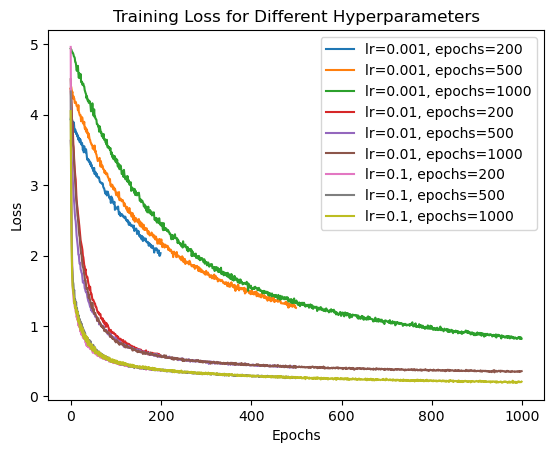

In [93]:
# Assume X_train_pca (112 features) and y_train_one_hot (5 classes) are preprocessed
params = initialize_params()
best_params, best_lr, best_epochs = train_with_hyperparameter_tuning(X_train, y_train_one_hot, params, learning_rates, epochs_list)


Epoch 0, Loss: 6.9489
Epoch 100, Loss: 0.7596


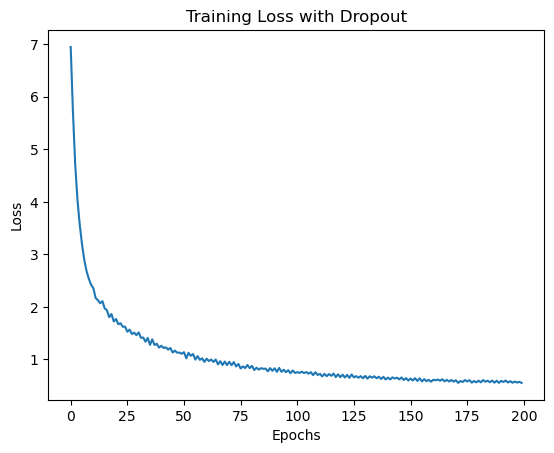

In [94]:
# Assume X_train_pca (112 features) and y_train_one_hot (5 classes) are preprocessed
params = initialize_params()
trained_params_dropout, loss_history_dropout = train_with_dropout(X_train, y_train_one_hot, params, dropout_rate=0.2)

plt.plot(loss_history_dropout)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss with Dropout')
plt.show()


In [95]:
predictions = np.argmax(forward_pass_with_dropout(X_val, trained_params_dropout)[0], axis=1)
actual = np.argmax(y_val_one_hot, axis=1)
Validation_accuracy = np.mean(predictions == actual)
print(f"Validation Accuracy: {Validation_accuracy:.4f}")


Validation Accuracy: 0.8060


In [96]:
predictions = np.argmax(forward_pass_with_dropout(X_test, trained_params_dropout)[0], axis=1)
actual = np.argmax(y_test_one_hot, axis=1)
Test_accuracy = np.mean(predictions == actual)
print(f"Test Accuracy: {Test_accuracy:.4f}")


Test Accuracy: 0.8092
